<a href="https://colab.research.google.com/github/revanthsai87/Primary_secondary_Diabetic_Retinopathy/blob/main/Primary_secondary_Relief_Algo_%2B_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #Authenticate Google Drive in case you need to import dataset from there.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
#4/1AX4XfWiKGCSZqTbMDjmakHbrfcWLfFz-p5oSO59g6ddCfhAjH1YABV-QnJg
#Importing  dataset from Google Drive
downloaded = drive.CreateFile({'id':"1DIp2YKX0DdXtTbIcTOwY76gaRLlMS8We"})   # replace the id with id of file you want to access
downloaded.GetContentFile('proc_data.csv')  
df = pd.read_csv('proc_data.csv')
df['dr_status'] = pd.factorize(df['dr_status'])[0]
#print(df)
# downloaded = drive.CreateFile({'id':"1UXl-ztH-RNvjOREU3U8eWZ7xKPSLZ2zL"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('cat_or_cont.csv')  
# choices_df = pd.read_csv('cat_or_cont.csv')
# choices_df.drop('dr_status',axis=1,inplace=True)

downloaded = drive.CreateFile({'id':"1ogiaFB6XP2kIwhHAywerp_FoN1c-coL9"})   # replace the id with id of file you want to access
downloaded.GetContentFile('pri_sec.csv')  
choices_df = pd.read_csv('pri_sec.csv')
#print("asdasdads")
#print(choices_df.columns)
#choices_df.drop('dr_status',axis=1,inplace=True)
df.drop('stdr',axis=1,inplace=True)
#df.drop('ffa',axis=1,inplace=True)
df.drop('literacy',axis=1,inplace=True)
df.drop('ses',axis=1,inplace=True)
df.drop('diabetic_status',axis=1,inplace=True)
df.drop('dm_dur',axis=1,inplace=True)
df.drop('diet_control',axis=1,inplace=True)
df.drop('oha',axis=1,inplace=True)
df.drop('cv',axis=1,inplace=True)
df.drop('ffa',axis=1,inplace=True)
df.drop('csme',axis=1,inplace=True)
df.drop('fbs_cat',axis=1,inplace=True)
df.drop('fbs',axis=1,inplace=True)
df.drop('kd_nd',axis=1,inplace=True)
df.drop('smoking_status',axis=1,inplace=True)
df.drop('typeofdm',axis=1,inplace=True)
df.drop('dme_odpresentabsent',axis=1,inplace=True)
df.drop('csme_ospresentabsent',axis=1,inplace=True)
df.drop('urineforproteinuria',axis=1,inplace=True)
# df.drop('age',axis=1,inplace=True)
df.drop('bmi',axis=1,inplace=True)
df.drop('kd_nd_1',axis=1,inplace=True)
df.drop('sbp',axis=1,inplace=True)
df.drop('dbp',axis=1,inplace=True)
df.drop('hba1c',axis=1,inplace=True)
df.drop('hba1c_cat',axis=1,inplace=True)
df.drop('restype',axis=1,inplace=True)
df.drop('sbp_cat_new',axis=1,inplace=True)
df.drop('dbp_cat_new',axis=1,inplace=True)
df.drop('dbp_cat',axis=1,inplace=True)
df.drop('pp',axis=1,inplace=True)
df.drop('map',axis=1,inplace=True)
df.drop('pp_cat',axis=1,inplace=True)
df.drop('map_cat',axis=1,inplace=True)
df.drop('htn_new',axis=1,inplace=True)
df.drop('bmi_cat_new',axis=1,inplace=True)

se = df.to_numpy()
X = se[:,0:-1]
y = se[:,-1]
df.drop('dr_status',axis=1,inplace=True)
#print(df)
#for col in df.columns:
#    print(col)
print(X.shape)
print(y.shape)

(3990, 9)
(3990,)



***Finding Primary and Secondary Attributes***

In [ ]:
pri_cols = []
sec_cols = []
for i in range(0,X.shape[1]):
  curr_ch = choices_df[df.columns[i]][0]
  if curr_ch==1:
    pri_cols.append(i)
  else:
    sec_cols.append(i)
#print(pri_cols)
print("Primary Attributes----", df.columns[pri_cols])
print("Secodary Attributes----",df.columns[sec_cols])

Primary Attributes---- Index(['diabetes mellitus duration', 'insulin treatment',
       'hypertension history', 'fasting plasma glucose',
       'systolic blood pressure status', 'glycosylated hemoglobin status'],
      dtype='object')
Secodary Attributes---- Index(['Gender', 'Age status', 'Bmi status'], dtype='object')


**List of all primary and secondary attributes**

In [ ]:
#Storing the list of attribute names.
list_col = list(df.columns)[:]
ls = []
for i in pri_cols:
  ls.append(list_col[i])
for i in sec_cols:
  ls.append(list_col[i])
list_col = ls
print(list_col)

['diabetes mellitus duration', 'insulin treatment', 'hypertension history', 'fasting plasma glucose', 'systolic blood pressure status', 'glycosylated hemoglobin status', 'Gender', 'Age status', 'Bmi status']


**CORRELATION MATRIX**

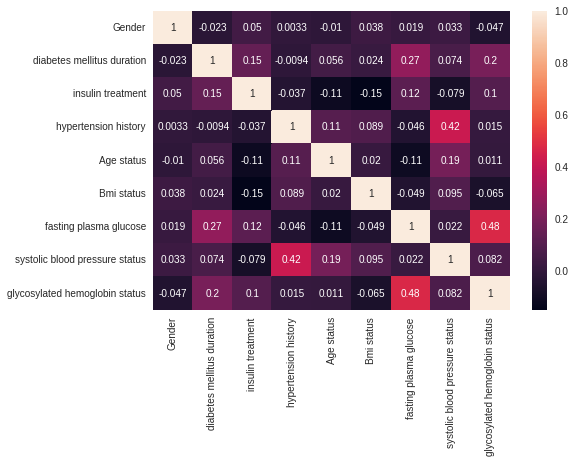

In [ ]:
import seaborn as sns
cf = df.corr()
sns.heatmap(cf,annot=True)

**IMPORTING ALL LIBRARIES**

In [ ]:
#Import all necessary libraries
import sys
from collections import Counter 
from scipy.sparse import csgraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pyplot
import random
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('seaborn')

**SMOTEEENN CODE AS THIS HELPS IN SPLITING DATA SET CLOSE TO EQUAL**

In [ ]:
c1=0
c2=1
while abs(c2-c1)>0:
  c1=0
  c2=0
  smt = SMOTEENN(random_state=42)
  X, y = smt.fit_resample(X, y)
  for z in y:
     if z==0:
        c1+=1
     else:
        c2+=1
       
print("Count of Zeros",c1)
print("Count of ones",c2)        

Count of Zeros 1945
Count of ones 1945


**TRAIN AND SPLIT DATA SET**

In [ ]:
#Splitting dataset into training and test sets.
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.70,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.3,random_state=0)

**RELIEF ALGORITHM**

In [ ]:
def relief_algorithm(arr, rows, cols,M,k):
    #Releif Algorithm
    n = rows
    a = cols
    #w = Weights of attributes
    W = np.zeros(a-1)#need to put a as target separate

    # arr  is array of data

    #max of a column-min of column
    denominator = arr.max(axis=0)-arr.min(axis=0)
    denominator = denominator[:-1]
    #print(denominator)

    for i in range(M):
        #randomly select target instance Ri
        r = np.random.randint(n)
        ri = np.array(arr[r,:])
        
        #same array containing all hits
        #diff array containing all misses
        
        diff = arr[arr[:, -1] != ri[-1]]
        a_del = np.delete(arr, r,axis = 0)
        same = a_del[a_del[::, -1] == ri[-1]]

        hit = np.argmin(np.sum(np.abs(ri[:-1]- same[::,:-1]),axis = 1))
        miss = np.argmin(np.sum(np.abs(ri[:-1]- diff[::,:-1]),axis = 1))


        h = same[hit,:-1]
        m = diff[miss,:-1]

        #update weights
        W = W - np.abs(ri[:-1]-h)/M/denominator + np.abs(ri[:-1]-m)/M/denominator

    actual_rank=[]
    dummy_rank = np.argsort(W*(-1))# sorted array, just indices
    #dummy_rank = np.argsort(W)
    if(k==0):
      for i in range(len(dummy_rank)):
        actual_rank.append(pri_cols[dummy_rank[i]])
    if(k==1):
      for i in range(len(dummy_rank)):
        actual_rank.append(sec_cols[dummy_rank[i]])
    print(dummy_rank)
    print(actual_rank) #Rank wise order of primary attibutes with actual indices.
    return dummy_rank, actual_rank

**FINDING RANK OF PRIMARY AND SECONDARY ATTRIBUTES**

In [ ]:
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
rank_actual_ind_pri=[]
rank_attr_pri = []

num_attrs_pri = X_train[:,pri_cols].shape[1]

#releif algorithm here


y_train_new = np.reshape(y_train,(y_train.shape[0],1))
X_train_new = np.append(X_train[:,pri_cols], y_train_new, axis=1)


rank_attr_pri, rank_actual_ind_pri = relief_algorithm(X_train_new[:,:], X_train_new[:,:].shape[0], X_train_new[:,:].shape[1] ,50000,0)

[5 0 1 2 3 4]
[8, 1, 2, 3, 6, 7]


In [ ]:
from scipy import stats
rank_actual_ind_sec=[]
num_attrs_sec = X_train[:,sec_cols].shape[1]
# print(num_attrs_sec)
rank_attr_sec = []

# relief algo part
y_train_new = np.reshape(y_train,(y_train.shape[0],1))
X_train_new = np.append(X_train[:,sec_cols], y_train_new, axis=1)


rank_attr_sec, rank_actual_ind_sec = relief_algorithm(X_train_new[:,:], X_train_new[:,:].shape[0], X_train_new[:,:].shape[1] ,50000,1)

[2 1 0]
[5, 4, 0]



**FINDING WEIGHTS OF PRIMARY AND SECONDARY WITH FOUND RANKS**

In [ ]:
weights_pri = np.zeros(num_attrs_pri)
# print(weights_pri)
# print(num_attrs_pri)
# print(rank_attr_pri)
i = 1
for r in rank_attr_pri:
    weights_pri[r] = num_attrs_pri - i
    i+=1
print(weights_pri)

[4. 3. 2. 1. 0. 5.]


In [ ]:
weights_sec= np.zeros(num_attrs_sec)
#print(weights)
i = 1
for r in rank_attr_sec:
    weights_sec[r] = num_attrs_sec - i
    i+=1
print(weights_sec)

[0. 1. 2.]


**CODE TO FIND BEST PRIMARY AND SECONDARY ATTRIBUTE COMBINATION FOR ALL MODELS**

In [ ]:
pri_sec_combo={} #Dict to store Combinations of primary and secondary
models_list={} # Dictonary to carry Different Models
best_sec={} #Dict To store Best Secondary if primary+secondary is not greater than primary alone.
models_list["Decision Tree"]= DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
models_list["SVM"]= SVC(tol=0.01, random_state=0, kernel='poly', gamma=0.01, degree=4, class_weight='balanced', C=15,probability=True)
models_list["KNN"]=KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
models_list["Logistic Regression"]=LogisticRegression(tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
models_list["Naive Bayes"]=GaussianNB(var_smoothing=1e-10)
#Loop through all models and find best combinations for each model.
k=0
for m in models_list:
   
   combo= {} #dict to store best combination for each model.
   #prev_s1=-1.00 #variable to store cv score for each model.
   sec_attr={}
   #print(m)
   for i in rank_actual_ind_pri:
      temp_sec=-0.00
      #sec_attr={}
      combo[df.columns[i]]=-1 #initalize new entry for primary attribute
      n_t=pd.DataFrame(X_train[:,i]) #training data for corresponding primary attribute.
      X_t_train=n_t.to_numpy()
      prev_s1=cross_val_score(models_list[m], X_t_train, y_train, cv=5,scoring='roc_auc').mean() #reinitalize value of prev_s1 for finding max cv score.
      #print("1----->",prev_s1)
      for j in rank_actual_ind_sec:
         n1=pd.DataFrame(X_train[:,i])
         n1[1]=X_train[:,j]
         X1_train=n1.to_numpy() #Combination of each primary and secondary attribute.
         score1 = cross_val_score(models_list[m], X1_train, y_train, cv=5,scoring='roc_auc').mean()
         if score1>temp_sec:
             temp_sec=score1
             sec_attr[df.columns[i]]=df.columns[j]
         #print(score1)
         if prev_s1 < score1:
            prev_s1=score1
            combo[df.columns[i]] = df.columns[j]
   pri_sec_combo[m]=combo #Add Best Combinations found for each model. 
   best_sec[m]=sec_attr        
for i in pri_sec_combo:
   print(i,"-- ",pri_sec_combo[i] )

Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'systolic blood pressure status': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'systolic blood pressure status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Gender', 'hypertension history': 'Gender', 'fasting plasma glucose': 'Bmi status', 'systoli

**HELPING FUNCTIONS TO CALCULATE METRICS**

In [ ]:
# Code to store Model names as a list instead of dict.
model_list_=[]
for x in models_list:
  model_list_.append(x)

In [ ]:
def confusion_metrics (conf_matrix,find):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # print('True Positives:', TP)
    # print('True Negatives:', TN)
    # print('False Positives:', FP)
    # print('False Negatives:', FN)
    
    # calculate accuracy
    if(find=="accuracy"):
         return  (float (TP+TN) / float(TP + TN + FP + FN))

    
    # calculate mis-classification
    #conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    elif(find=="sensitivity"):
              return  (TP / float(TP + FN))
    # calculate the specificity
    elif(find=="specificity"):
              return  (TN / float(TN + FP))
    
    # calculate precision
    elif(find =="precision"):
           return  (TN / float(TN + FP))
    elif(find =="fpr"):
           return  (FP / float(TN + FP))           
    else:
      return -1
    # calculate f_1 score
    #conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    # print('-'*50)
    # print(f'Accuracy: {round(conf_accuracy,2)}') 
    # print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    # print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    # print(f'Specificity: {round(conf_specificity,2)}') 
    # print(f'Precision: {round(conf_precision,2)}')
    # print(f'f_1 Score: {round(conf_f1,2)}')
    #print(conf_specificity)

In [ ]:
def Calculate_metrics(metric_tofind):
  _score_combo={} #dict to store the primary and secondary attributes till we find best value.
  combo_ind_={} # dict to store all best combinations till the best value.
  _scores_values=[] #Best Values stored for Drawing Graph
  X2_test = np.ndarray([]) # Testing Data
  X2_train=np.ndarray([]) #Training data
  Graph_attributes=[0,1,2,3,4,5]
  for i in pri_sec_combo:
    temp= -1.0 # Temporary variable for finding max metric value.
    _combo=[0,0] # To store best pri sec combo for metric
    X2_train = np.ndarray([])
    X2_test=np.ndarray([])
    graph_=[] #List to store all values of metric.
    #print(i)
    for x in pri_sec_combo[i]:
      #print(x,pri_sec_combo[i][x])
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)]) #Adding Test Data for respective Combinations primary
      if pri_sec_combo[i][x]!=-1: # case to handle when there is only primary attribute 
           n1[1]=X_test[:,df.columns.get_loc(pri_sec_combo[i][x])]# Adding Test data for respective secondary
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])  #Adding Train Data for respective Combinations primary
      if pri_sec_combo[i][x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(pri_sec_combo[i][x])] # Adding Train data for respective secondary
      #-----------------#
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
          #----------------#
      models_list[i].fit(X2_train, y_train) #Fitting in Model
      y_pred=models_list[i].predict(X2_test) #Predicting the Model
      #Code to find appropriate Metric
      if(metric_tofind=="f1"):
           _score=f1_score(y_test, y_pred, average='weighted')
      elif(metric_tofind=="auc"):
           _score=roc_auc_score(y_test, y_pred)
      elif(metric_tofind=="sensitivity"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity")          
      elif(metric_tofind=="specificity"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"specificity")          
      elif(metric_tofind=="precision"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"precision")     
      elif(metric_tofind=="false_positive_rate"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"fpr")     
      elif(metric_tofind=="accuracy"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"accuracy")             
      elif(metric_tofind=="roc-auc"):
           _score=(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity"))+(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"fpr"))                                    
      elif(metric_tofind=="prec-rec"):
           _score=(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity"))+(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"precision"))                                          
      #Graph_attributes.append("Till"+x+"-"+pri_sec_combo[i][x])
      graph_.append(_score)
      #print(f_score)
      if _score>temp:
        temp=_score
        _combo[0]=x
        #print(X2_train.shape)
        _combo[1]=pri_sec_combo[i][x]
    
    #print(i, metric_tofind,"-Score--",temp)
    plt.plot(Graph_attributes,graph_, linestyle="--", marker="o", label=i)
    _scores_values.append(temp)
    _score_combo[i]=_combo
  for x in pri_sec_combo:
    temp_combo_={}
    for i in pri_sec_combo[x]:
      #  print("f1_score_combo[x][0]")
      #  print(f1_score_combo[x][0])
       if(_score_combo[x][0]!=i):
         temp_combo_[i]=pri_sec_combo[x][i]
        #  print("pri_sec_combo[x][i]")
        #  print(pri_sec_combo[x][i])
        #  print("temp_combo_f1[i]")
        #  print(temp_combo_f1[i])

       else:
            temp_combo_[i]=pri_sec_combo[x][i]
            break
    combo_ind_[x]=temp_combo_
  return combo_ind_,_scores_values


**CODE TO PLOT BAR GRAPH FOR EACH MODEL**

In [ ]:
def Plot_bar_graph(in_combo,in_model,in_sec):
  X2_test = np.ndarray([]) # Testing Data
  X2_train=np.ndarray([]) #Training data
  graph_attributes=[]
  ind=0
  for x in in_combo:
      #print(x,pri_sec_combo[i][x])
      attri=[]
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)]) #Adding Test Data for respective Combinations primary
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])  #Adding Train Data for respective Combinations primary
      X2_test=n1.to_numpy()  
      X2_train=n2.to_numpy() 
      in_model.fit(X2_train, y_train) #Fitting in Model
      y_pred=in_model.predict(X2_test) #Predicting the Model
      #Code to find AUC_score
      _score=roc_auc_score(y_test, y_pred)  
      #Preparing Data Set for Graph
      attri.append("Primary")
      attri.append(_score)
      if in_combo[x]!=-1:
           attri.append(x+" || "+ x +"+"+in_combo[x])
      else:
           attri.append(x+" || "+ x +"+"+in_sec[x])     
      graph_attributes.append(attri)
      attri=[]
      if in_combo[x]!=-1: # case to handle when there is only primary attribute 
           n1[1]=X_test[:,df.columns.get_loc(in_combo[x])]# Adding Test data for respective secondary
      else:
        n1[1]=X_test[:,df.columns.get_loc(in_sec[x])]     
      if in_combo[x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(in_combo[x])] # Adding Train data for respective secondary
      else:
        n2[1]=X_train[:,df.columns.get_loc(in_sec[x])]     
      #-----------------#
      X2_test=n1.to_numpy()  
      X2_train=n2.to_numpy()     
      #----------------#
      in_model.fit(X2_train, y_train) #Fitting in Model
      y_pred=models_list[i].predict(X2_test) #Predicting the Model
     #Code to find AUC_score
      _score=roc_auc_score(y_test, y_pred)
       #Preparing Data Set for Graph
      attri.append("Primary+Secondary")
      attri.append(_score)
      if in_combo[x]!=-1:
           attri.append(x+" || "+ x +"+"+in_combo[x])
      else:
           attri.append(x+" || "+ x +"+"+in_sec[x]) 
      graph_attributes.append(attri)
      #ind to maintain combination index
      ind+=1
  data_graph = pd.DataFrame(graph_attributes, columns = ['Category', 'Auc-Score','combinations'])    
  ax=sns.barplot(x = "combinations", y = "Auc-Score", hue = "Category", ci = None, data = data_graph)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**BAR GRAPHS FOR ALL MODELS**

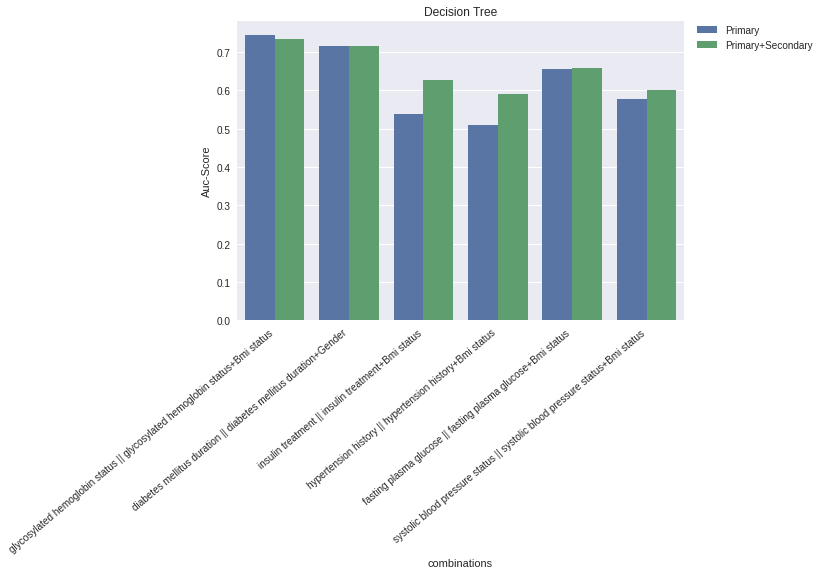

<Figure size 720x576 with 0 Axes>

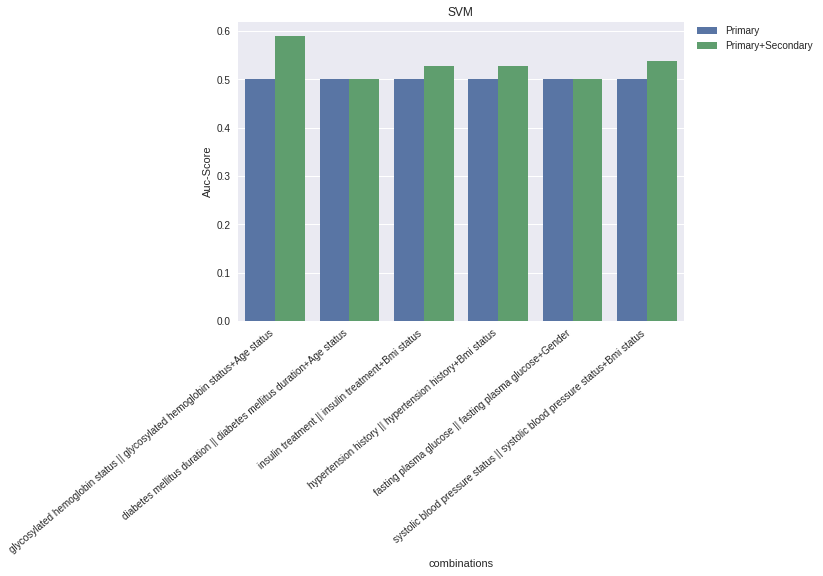

<Figure size 720x576 with 0 Axes>

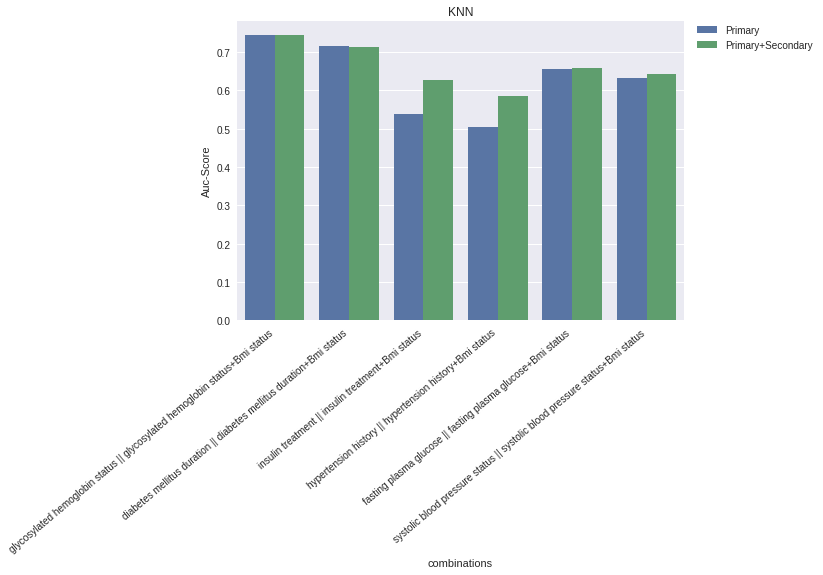

<Figure size 720x576 with 0 Axes>

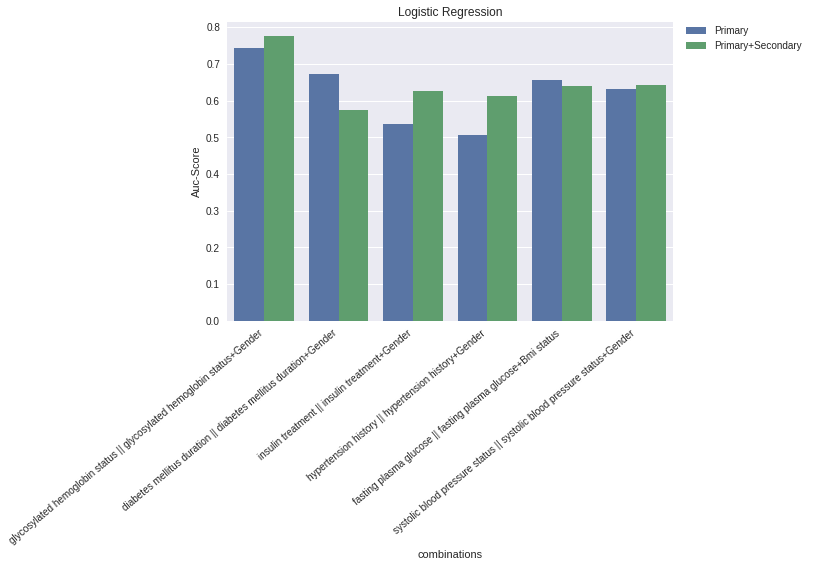

<Figure size 720x576 with 0 Axes>

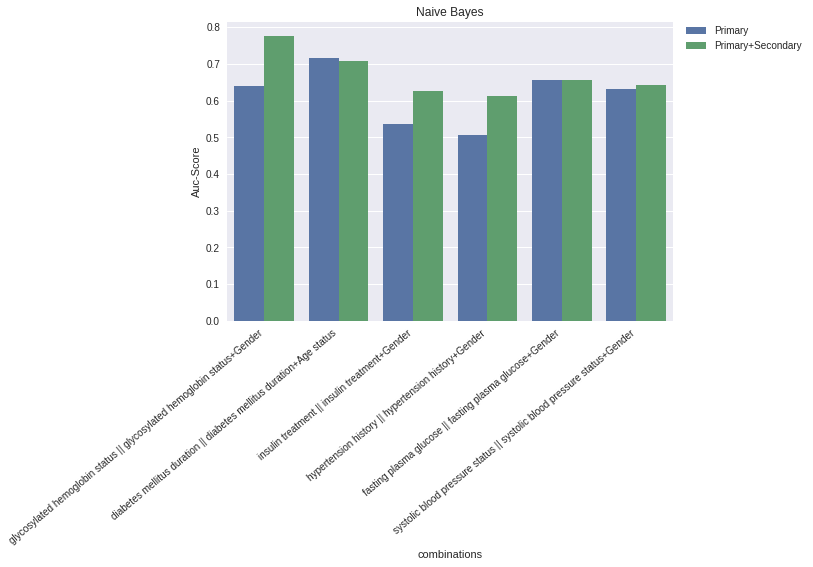

<Figure size 720x576 with 0 Axes>

In [ ]:
for i in pri_sec_combo:
   plt.close()
   plt.title(""+ i)
   Plot_bar_graph(pri_sec_combo[i],models_list[i],best_sec[i])
   plt.figure(figsize=(10,8))
   plt.tight_layout()
   plt.show()





**CODE TO FIND BEST F1 SCORE FOR PRIMARY AND SECONDARY COMBINATION FOR EACH MODEL**


F1 Scores of all Models
Decision Tree ----- 0.8806921675774135
SVM ----- 0.7867230410272017
KNN ----- 0.8606232831296771
Logistic Regression ----- 0.7800434038531243
Naive Bayes ----- 0.7823770038695411
---------------------###############----------------------------
Best Combinations For F1 Score
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Age status'

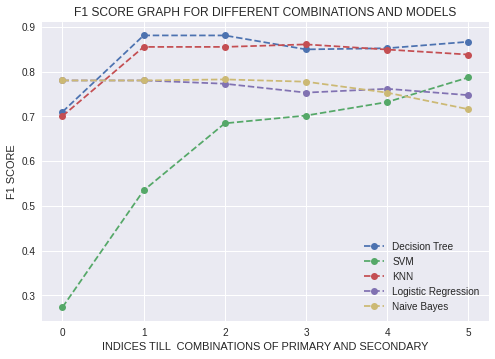

In [ ]:
combo_ind_f1,f1_scores_values=Calculate_metrics("f1")
print("F1 Scores of all Models")
for i in range(len(f1_scores_values)):
   print(model_list_[i],"-----",f1_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For F1 Score")
for i in combo_ind_f1:
   print(i,"-- ",combo_ind_f1[i] )
print("-----------------GRAPH--------------------")
plt.title('F1 SCORE GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('F1 SCORE')
plt.legend(loc='best')
plt.savefig('F1_SOCRE_COMBO',dpi=500)
plt.show()   

**CODE TO FIND BEST AUC SCORE FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL**



AUC Scores of all Models
Decision Tree ----- 0.8865384615384616
SVM ----- 0.8064102564102563
KNN ----- 0.8692307692307691
Logistic Regression ----- 0.7756410256410257
Naive Bayes ----- 0.7769230769230769
---------------------###############----------------------------
Best Combinations For AUC Score
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Age statu

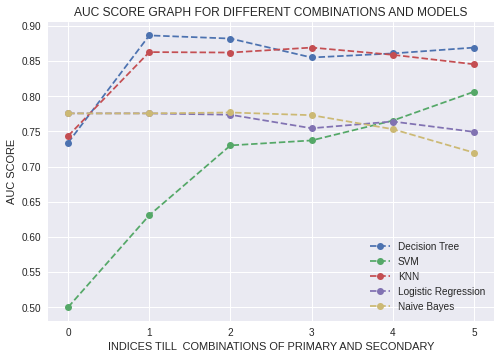

In [ ]:
combo_ind_auc,auc_scores_values=Calculate_metrics("auc")
print("AUC Scores of all Models")
for i in range(len(auc_scores_values)):
   print(model_list_[i],"-----",auc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For AUC Score")
for i in combo_ind_auc:
   print(i,"-- ",combo_ind_auc[i] )
print("-----------------GRAPH--------------------")
plt.title('AUC SCORE GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('AUC SCORE')
plt.legend(loc='best')
plt.savefig('AUC_SOCRE_COMBO',dpi=300)
plt.show()


**CODE TO FIND BEST ACCURACY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL**


Accuracy of all Models
Decision Tree ----- 0.8803418803418803
SVM ----- 0.7891737891737892
KNN ----- 0.8603988603988604
Logistic Regression ----- 0.7806267806267806
Naive Bayes ----- 0.7834757834757835
---------------------###############----------------------------
Best Combinations For Accuracy
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Age status',

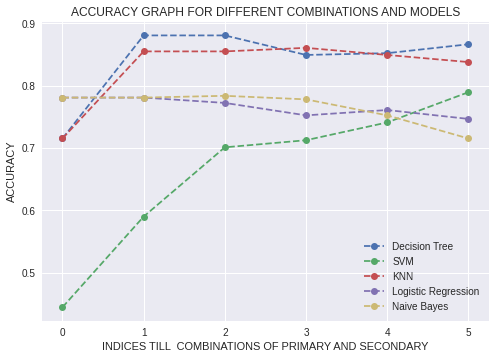

In [ ]:
combo_ind_acc,acc_scores_values=Calculate_metrics("accuracy")
print("Accuracy of all Models")
for i in range(len(acc_scores_values)):
   print(model_list_[i],"-----",acc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Accuracy")
for i in combo_ind_acc:
   print(i,"-- ",combo_ind_acc[i] )
print("-----------------GRAPH--------------------")
plt.title('ACCURACY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('ACCURACY')
plt.legend(loc='best')
plt.savefig('ACCURACY_COMBO',dpi=300)
plt.show()

***CODE TO FIND BEST SENSITIVITY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

Sensitivity Scores of all Models
Decision Tree ----- 0.8666666666666667
SVM ----- 0.6512820512820513
KNN ----- 0.7948717948717948
Logistic Regression ----- 0.8205128205128205
Naive Bayes ----- 0.8358974358974359
---------------------###############----------------------------
Best Combinations For Sensitivity
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Ag

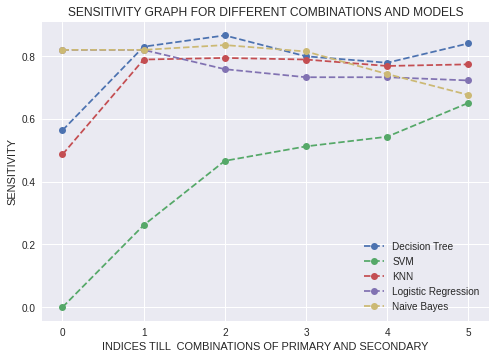

In [ ]:
combo_ind_sensi,sensi_scores_values=Calculate_metrics("sensitivity")
print("Sensitivity Scores of all Models")
for i in range(len(sensi_scores_values)):
   print(model_list_[i],"-----",sensi_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Sensitivity")
for i in combo_ind_sensi:
   print(i,"-- ",combo_ind_sensi[i] )
print("-----------------GRAPH--------------------")
plt.title('SENSITIVITY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SENSITIVITY')
plt.legend(loc='best')
plt.savefig('SENSITIVITY_COMBO',dpi=500)
plt.show()

***CODE TO FIND BEST SPECIFICITY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***


Specificity Scores of all Models
Decision Tree ----- 0.9423076923076923
SVM ----- 1.0
KNN ----- 1.0
Logistic Regression ----- 0.7948717948717948
Naive Bayes ----- 0.7628205128205128
---------------------###############----------------------------
Best Combinations For Specificity
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender'}
SVM --  {'glycosylated hemoglobin status': -1}
KNN --  {'glycosylated hemoglobin status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Gender', 'hypertension history': 'Gender', 'fasting plasma glucose': 'Bmi status'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Gender', 'hypertension history': 'Gender', 'fasting plasma glucose': 'Gender'}
-----------------GRAPH--------------------


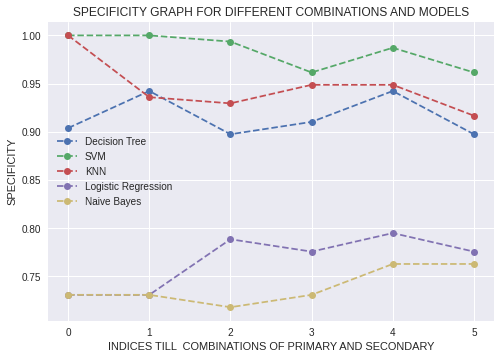

In [ ]:
combo_ind_speci,speci_scores_values=Calculate_metrics("specificity")
print("Specificity Scores of all Models")
for i in range(len(speci_scores_values)):
   print(model_list_[i],"-----",speci_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Specificity")
for i in combo_ind_speci:
   print(i,"-- ",combo_ind_speci[i] )
print("-----------------GRAPH--------------------")
plt.title('SPECIFICITY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SPECIFICITY')
plt.legend(loc='best')
plt.savefig('SPECIFICITY_COMBO',dpi=300)
plt.show()

***CODE TO FIND BEST FALSE POSITIVE RATE FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

False Positive Rate Scores of all Models
Decision Tree ----- 0.10256410256410256
SVM ----- 0.038461538461538464
KNN ----- 0.08333333333333333
Logistic Regression ----- 0.2692307692307692
Naive Bayes ----- 0.28205128205128205
---------------------###############----------------------------
Best Combinations For Fasle Positive Rate
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'systolic blood pressure status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated 

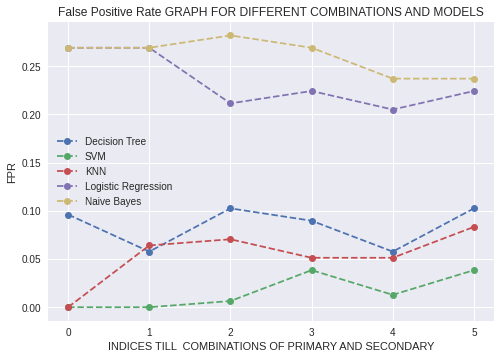

In [ ]:
combo_ind_fpr,fpr_scores_values=Calculate_metrics("false_positive_rate")
print("False Positive Rate Scores of all Models")
for i in range(len(fpr_scores_values)):
   print(model_list_[i],"-----",fpr_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Fasle Positive Rate")
for i in combo_ind_fpr:
   print(i,"-- ",combo_ind_fpr[i] )
print("-----------------GRAPH--------------------")
plt.title('False Positive Rate GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('FPR')
plt.legend(loc='best')
plt.savefig('FPR_COMBO',dpi=300)
plt.show()


***CODE TO FIND BEST TPR+FPR FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

TPR+FPR Scores of all Models
Decision Tree ----- 0.9692307692307692
SVM ----- 0.6897435897435897
KNN ----- 0.8653846153846153
Logistic Regression ----- 1.0897435897435896
Naive Bayes ----- 1.117948717948718
---------------------###############----------------------------
Best Combinations For TPR+FPR 
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes mellitus duration': 'Age status

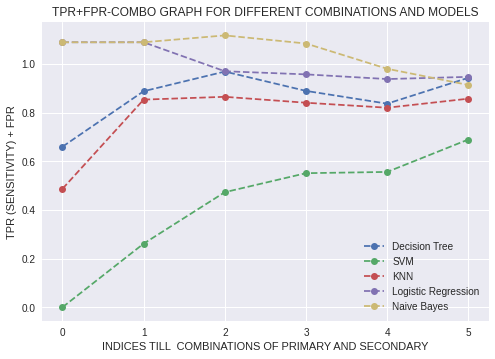

In [ ]:
combo_ind_rocauc,rocauc_scores_values=Calculate_metrics("roc-auc")
print("TPR+FPR Scores of all Models")
for i in range(len(rocauc_scores_values)):
   print(model_list_[i],"-----",rocauc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For TPR+FPR ")
for i in combo_ind_rocauc:
   print(i,"-- ",combo_ind_rocauc[i] )
print("-----------------GRAPH--------------------")
plt.title('TPR+FPR-COMBO GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('TPR (SENSITIVITY) + FPR')
plt.legend(loc='best')
plt.savefig('TPR+FPR_COMBO',dpi=300)
plt.show()


***CODE TO FIND BEST SENSITIVITY(RECALL) +PRECISION FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

Sensitivity+ Precision  Scores of all Models
Decision Tree ----- 1.773076923076923
SVM ----- 1.6128205128205129
KNN ----- 1.7384615384615385
Logistic Regression ----- 1.551282051282051
Naive Bayes ----- 1.5538461538461539
---------------------###############----------------------------
Best Combinations For SENSITIVITY+PRECISION 
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status', 'fasting plasma glucose': 'Gender', 'systolic blood pressure status': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'diabetes

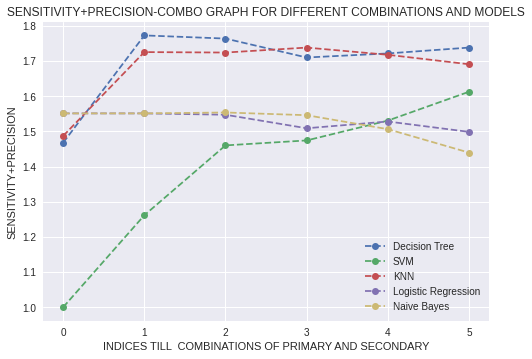

In [ ]:
combo_ind_prerec,prerec_scores_values=Calculate_metrics("prec-rec")
print("Sensitivity+ Precision  Scores of all Models")
for i in range(len(prerec_scores_values)):
   print(model_list_[i],"-----",prerec_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For SENSITIVITY+PRECISION ")
for i in combo_ind_prerec:
   print(i,"-- ",combo_ind_prerec[i] )
print("-----------------GRAPH--------------------")
plt.title('SENSITIVITY+PRECISION-COMBO GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SENSITIVITY+PRECISION')
plt.legend(loc='best')
plt.savefig('SENSITIVITY+PRECISION_COMBO',dpi=300)
plt.show()


**Graphs of ALL Metrics AUC, F1_SCORE, SENSITIVITY,SPECIFICITY,FALSE POSITIVE RATE**

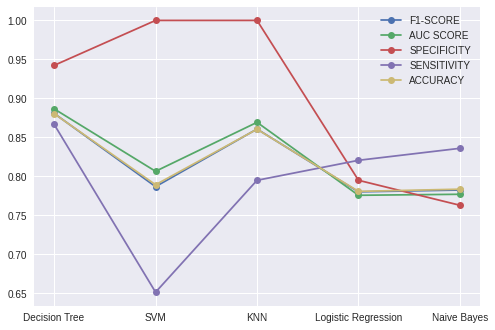

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mdl_names=model_list_
plt.plot(mdl_names,f1_scores_values,linestyle="-", marker="o", label="F1-SCORE")
plt.plot(mdl_names, auc_scores_values, linestyle="-", marker="o", label="AUC SCORE")
plt.plot(mdl_names, speci_scores_values, linestyle="-", marker="o", label="SPECIFICITY")
plt.plot(mdl_names, sensi_scores_values, linestyle="-", marker="o", label="SENSITIVITY")
#plt.plot(mdl_names, fpr_scores_values, linestyle="-", marker="o", label="FPR")
plt.plot(mdl_names, acc_scores_values, linestyle="-", marker="o", label="ACCURACY")
plt.legend()
plt.savefig('COMPARISON OF ALL METRICS',dpi=300)
plt.show()

**CODE TO DRAW ROC-AUC CURVES**

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
tr_pve=[] #TO Store True Positives of all models
fs_pve=[] #False Negatives of all models
for i in combo_ind_rocauc:
  X2_train = np.ndarray([])
  X2_test = np.ndarray([])
  t=[]
  #print(i)
  for x in combo_ind_rocauc[i]:
      #print(df.columns.get_loc(x))
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)])
      if combo_ind_rocauc[i][x]!=-1:
           n1[1]=X_test[:,df.columns.get_loc(combo_ind_rocauc[i][x])]
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])
      if combo_ind_rocauc[i][x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(combo_ind_rocauc[i][x])]
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
  #print(X2_train.shape)
  #print(X2_test.shape)        
  models_list[i].fit(X2_train, y_train)
  pred_prob=models_list[i].predict_proba(X2_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
  tr_pve.append(tpr1) #True positive rate values for eachh model
  fs_pve.append(fpr1) #False Positive rate values for each model

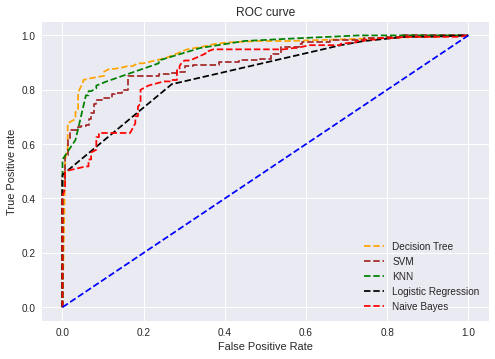

In [ ]:
color=["orange","brown","green","black","red"]
# plot roc curves
for i in range(5):
   plt.plot(fs_pve[i], tr_pve[i], linestyle="--", marker="",color=color[i], label=mdl_names[i])
plt.plot(p_fpr, p_tpr, linestyle="--", marker="", color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC1',dpi=300)
plt.show();

***CODE TO DRAW PRECISION RECALL  CURVE***

In [ ]:
pr=[] #TO Store precision of all models
re=[] #recall of all models
for i in pri_sec_combo:
  X2_train = np.ndarray([])
  X2_test = np.ndarray([])
  t=[]
  #print(i)
  for x in combo_ind_prerec[i]: #Comboindprec is list which stores all combinations whith maximum Precision+recall values.
      #print(df.columns.get_loc(x))
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)])
      if combo_ind_prerec[i][x]!=-1:
          n1[1]=X_test[:,df.columns.get_loc(combo_ind_prerec[i][x])]
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])
      if combo_ind_prerec[i][x]!=-1:
          n2[1]=X_train[:,df.columns.get_loc(combo_ind_prerec[i][x])]
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
  #print(X2_train.shape)
  #print(X2_test.shape)        
  models_list[i].fit(X2_train, y_train)
  pred_prob=models_list[i].predict_proba(X2_test)
  pr1, re1, thresh1 = metrics.precision_recall_curve(y_test, pred_prob[:,1], pos_label=1)
  pr.append(pr1)
  re.append(re1)

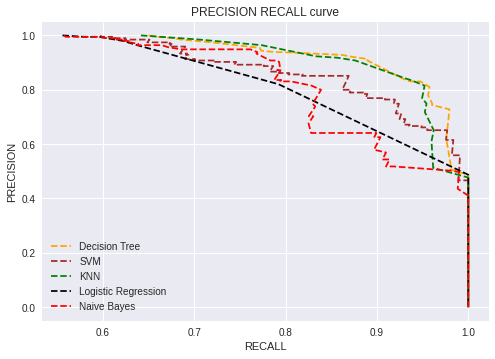

In [ ]:
# plot PRECISION RECALL CURVE
for i in range(5):
   plt.plot(pr[i], re[i], linestyle="--", marker="",color=color[i], label=mdl_names[i])
# title
plt.title('PRECISION RECALL curve')
# x label
plt.xlabel('RECALL')
# y label
plt.ylabel('PRECISION')

plt.legend(loc='best')
plt.savefig('PR_RE',dpi=300)
plt.show();



---
END OF CODE  BY REVANTH ON 10/02/22


---


